In [64]:
import numpy as np
from matplotlib import pyplot as plt

In [65]:
X = np.arange(0, 3 ,1)
y = X ** 2

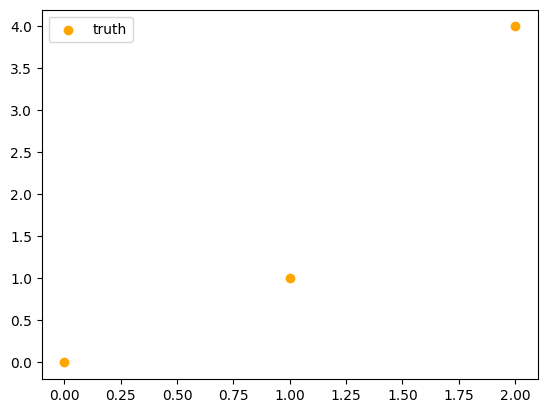

In [66]:
plt.scatter(X, y, color='orange', label='truth')
plt.legend()
plt.show()

In [67]:
w = np.array([0, 0, 0])
b = 0
X = np.c_[X, X**2, X**3]   # performing feature engineering
print(X)

[[0 0 0]
 [1 1 1]
 [2 4 8]]


In [68]:
def cost_function(x, y, w, b) -> float:
    m = len(y)
    cost = 0
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        cost += (f_wb - y[i]) ** 2
    cost = cost / (2.0 * m)
    return cost

In [69]:
def gradient_function(x, y, w, b) -> tuple:
    m, n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        err = np.dot(x[i], w) + b
        for j in range(n):
            dj_dw[j] += (err - y[i]) * x[i, j]
        dj_db += err - y[i]
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [70]:
def gradient_descent(x, y, w, b, alpha=0.1, iters=100) -> tuple:
    for i in range(iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i % 20 == 0:
            print('i=', i, 'Cost: ', cost_function(x, y, w, b), 'w: ', w, 'b: ', b)
    return w, b

In [71]:
gradient_descent(X, y, w, b)

i= 0 Cost:  10.445555555555558 w:  [0.3        0.56666667 1.1       ] b:  0.16666666666666669
i= 20 Cost:  2408912132862.737 w:  [ 92978.4458827  178304.48589687 348956.56592522] b:  50895.674123487785
i= 40 Cost:  5.562010961876914e+23 w:  [4.46772908e+10 8.56775692e+10 1.67678126e+11] b:  24455998292.023987
i= 60 Cost:  1.2842297366519092e+35 w:  [2.14680338e+16 4.11692142e+16 8.05715749e+16] b:  1.1751433196938704e+16
i= 80 Cost:  2.965197350032715e+46 w:  [1.03156764e+22 1.97823562e+22 3.87157158e+22] b:  5.646720306965524e+21


(array([-2.57702054e+27, -4.94194817e+27, -9.67180345e+27]),
 np.float64(-1.4106408152664623e+27))